<a href="https://colab.research.google.com/github/sahilaf/Ai-lab/blob/main/FINAL_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Load the dataset

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
0,0,Male,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,positive
1,1,Male,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,positive
2,2,Male,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,negative
3,3,Female,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,negative
4,4,Male,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,negative


# Encode the target variable 'Result' (0 for negative, 1 for positive)

In [ ]:
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])

# Check for missing values

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
ID                             0
Gender                         0
Age                            0
Hemoglobin(g/dl)               0
Neutrophils(%)                 0
Lymphocytes(%)                 0
Monocytes(%)                   0
Eosinophils(%)                 0
RBC                            0
HCT(%)                         0
MCV(fl)                        0
MCH(pg)                        0
MCHC(g/dl)                     0
RDW-CV(%)                      0
Total Platelet Count(/cumm)    0
MPV(fl)                        0
PDW(%)                         0
PCT(%)                         0
Total WBC count(/cumm)         0
Result                         0
dtype: int64


# Separate features and target

In [ ]:
X = df.drop(columns=['Result', 'ID'])
y = df['Result']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=40,
    stratify=y
)

# Define categorical and numerical columns

In [ ]:
categorical_cols = ['Gender']
numerical_cols = X.columns.difference(categorical_cols)

# Preprocessing pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to the training data

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Function to evaluate the model

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Train KNN model and find the best k (from 1 to 40)

In [ ]:
best_k = 1
best_accuracy = 0
train_accuracies = []
test_accuracies = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled, y_train_resampled)
    y_train_pred = knn.predict(X_train_resampled)
    y_test_pred = knn.predict(X_test_preprocessed)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"k = {k}, Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k

print(f"\nBest k: {best_k} with Test Accuracy: {best_accuracy:.4f}")


k = 1, Train Accuracy = 0.9993, Test Accuracy = 0.6190
k = 2, Train Accuracy = 0.8424, Test Accuracy = 0.5119
k = 3, Train Accuracy = 0.8800, Test Accuracy = 0.5952
k = 4, Train Accuracy = 0.7960, Test Accuracy = 0.5262
k = 5, Train Accuracy = 0.8321, Test Accuracy = 0.5619
k = 6, Train Accuracy = 0.7651, Test Accuracy = 0.5262
k = 7, Train Accuracy = 0.7872, Test Accuracy = 0.5833
k = 8, Train Accuracy = 0.7504, Test Accuracy = 0.5405
k = 9, Train Accuracy = 0.7725, Test Accuracy = 0.5833
k = 10, Train Accuracy = 0.7327, Test Accuracy = 0.5310
k = 11, Train Accuracy = 0.7563, Test Accuracy = 0.5738
k = 12, Train Accuracy = 0.7246, Test Accuracy = 0.5167
k = 13, Train Accuracy = 0.7482, Test Accuracy = 0.5595
k = 14, Train Accuracy = 0.7312, Test Accuracy = 0.5167
k = 15, Train Accuracy = 0.7511, Test Accuracy = 0.5571
k = 16, Train Accuracy = 0.7261, Test Accuracy = 0.5190
k = 17, Train Accuracy = 0.7386, Test Accuracy = 0.5548
k = 18, Train Accuracy = 0.7150, Test Accuracy = 0.5143
k

# Train the final KNN model with the best k

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=1)

# Evaluate the final model

In [ ]:
y_pred = final_knn.predict(X_test_preprocessed)
print("\nFinal Model Evaluation:")
evaluate_model(y_test, y_pred)


Final Model Evaluation:
Accuracy: 0.6190
Precision: 0.6544
Recall: 0.6190
F1-Score: 0.6309

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.54      0.47       129
           1       0.76      0.65      0.70       291

    accuracy                           0.62       420
   macro avg       0.59      0.60      0.59       420
weighted avg       0.65      0.62      0.63       420



# Visualize the training and testing accuracies across k values

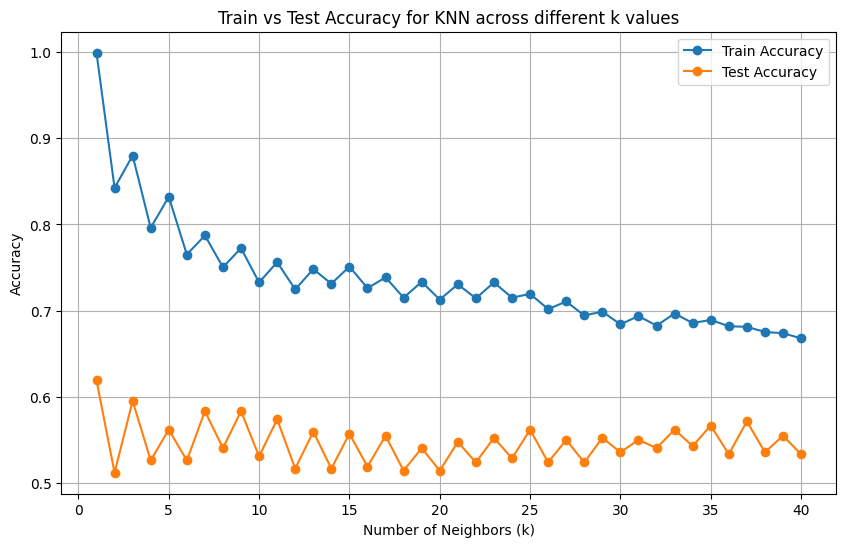

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, 41), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for KNN across different k values')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Optimization using GridSearchCV with SMOTE in the pipeline

In [ ]:
pipeline = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=40)),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
param_grid = {
    'classifier__n_neighbors': range(1, 41),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['Gender']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Eosinophils(%)', 'HCT(%)', 'Hemoglobin(g/dl)', 'Lymphocytes(%)',
       'MCH(pg)', 'MCHC(g/dl)', 'MCV(fl)', 'MPV(fl)', 'Monocytes(%)',
       'Neutrophils(%)', 'PCT(%)', 'PDW(%)', 'RBC', 'RDW-CV(%)',
       'Total Platelet Count(/cumm)', 'Total WBC count(/cumm)'],
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=40)),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': range(1, 41),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

# Print the best hyperparameters

In [ ]:
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)


Best Hyperparameters from Grid Search:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 6, 'classifier__weights': 'distance'}


# Evaluate the optimized model

In [ ]:
y_pred_optimized = grid_search.predict(X_test)
print("\nOptimized Model Evaluation:")
evaluate_model(y_test, y_pred_optimized)


Optimized Model Evaluation:
Accuracy: 0.6452
Precision: 0.6650
Recall: 0.6452
F1-Score: 0.6529

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.52      0.47       129
           1       0.77      0.70      0.73       291

    accuracy                           0.65       420
   macro avg       0.60      0.61      0.60       420
weighted avg       0.66      0.65      0.65       420



In [ ]:

test_df = pd.read_csv('test_dataset.csv')

test_df = test_df.drop(columns=['Result'], errors='ignore')

X_test_new = preprocessor.transform(test_df.drop(columns=['ID']))


y_test_pred = final_knn.predict(X_test_new)

results_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Result': y_test_pred
})

results_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'.")

Predictions saved to 'predictions.csv'.
